# Predicting heart disease using machine learning

This notebook looks into various Python machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> 

Given clinical parameters about a patient, can we predict whether or not they have heart disee#ted attribute)

## 2.Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

A version of it is also available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3.Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.


## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows aboutase or not (1=yes, 0=no) (= the predicted attribute)

### Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * Typical angina: chest pain related decrease blood supply to the heart
   * Atypical angina: chest pain not related to heart
   * Non-anginal pain: typically esophageal spasms (non heart related)
   * Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [54]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [55]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration(Exploratory Data Analysis or EDA)
The goal here is to find out more about the data and become a subject matter expert on the dataset you're workinng with
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are outliers and why should you care about them?
5. How can you add, change or remove features to get more and out of your data?

In [56]:
#Let's find out how many of each class there is 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

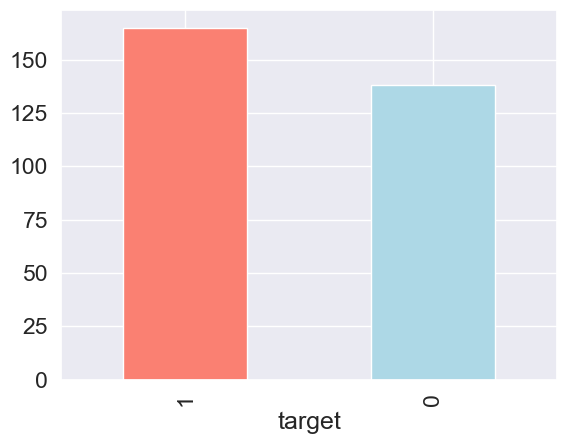

In [57]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [59]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
## Heart Disease Frequency according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [62]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)


sex,0,1
target,,
0,24,114
1,72,93


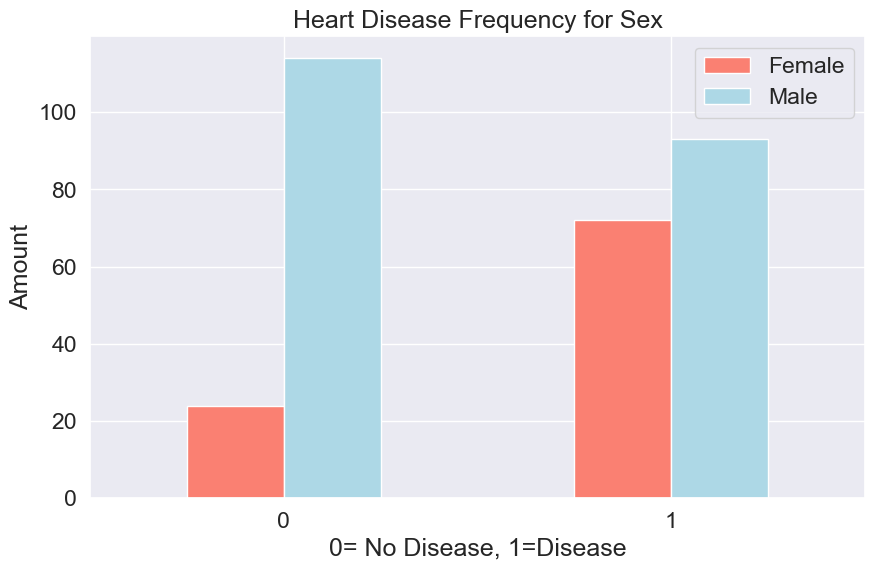

In [63]:
#Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=['salmon','lightblue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

### Age vs Max for Heart Disease

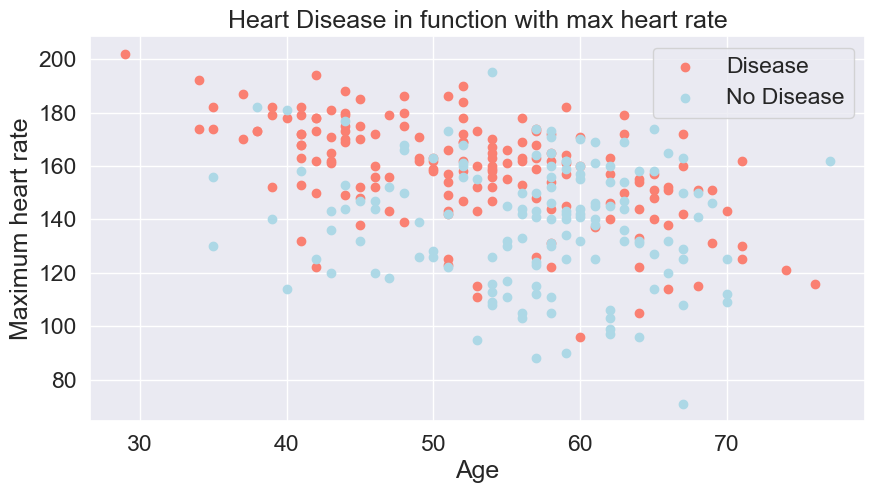

In [64]:
#Create another figure
plt.figure(figsize=(10,5))
#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");
#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='lightblue');
#Add some helpful info
plt.title("Heart Disease in function with max heart rate")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.legend(["Disease","No Disease"]);
            

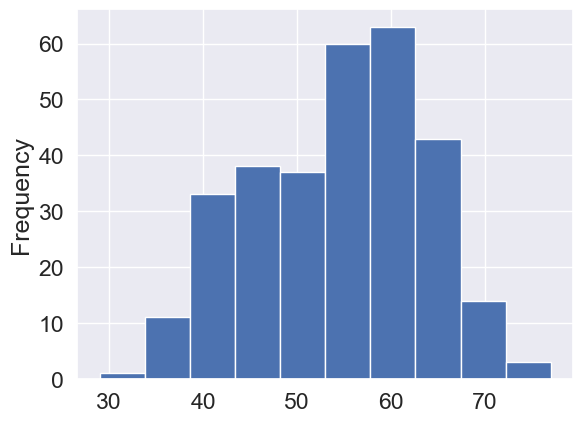

In [65]:
#Check the distribution of age column with a Histogram
df.age.plot.hist();

### Heart disease frquency per chest pain type
cp - chest pain type
0:
Typical angina: chest pain related decrease blood supply to the hear

1:
Atypical angina: chest pain not related to hea

2:t
Non-anginal pain: typically esophageal spams (non heart relat

3: d)
Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

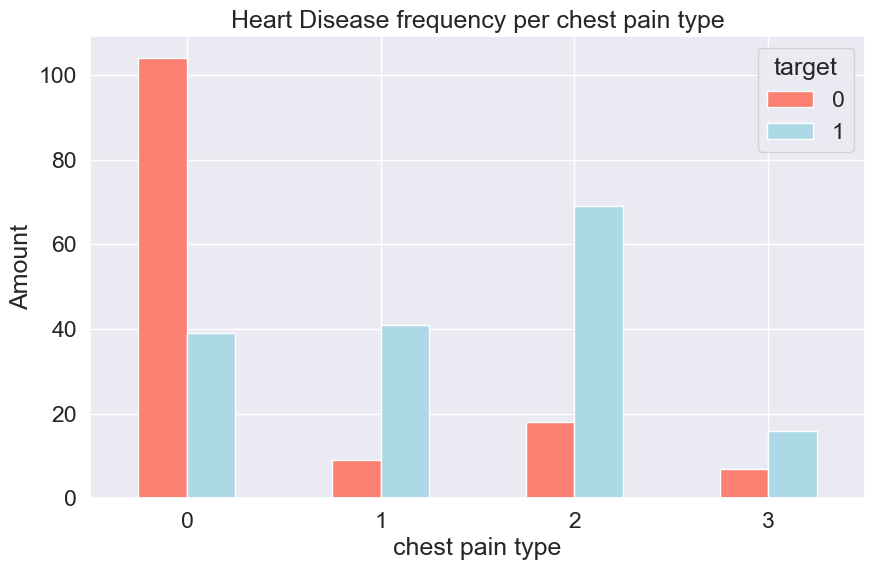

In [66]:
#Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=['salmon','lightblue']);
#Add some info
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount");
plt.xticks(rotation=0)

In [67]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [68]:
#Let's make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


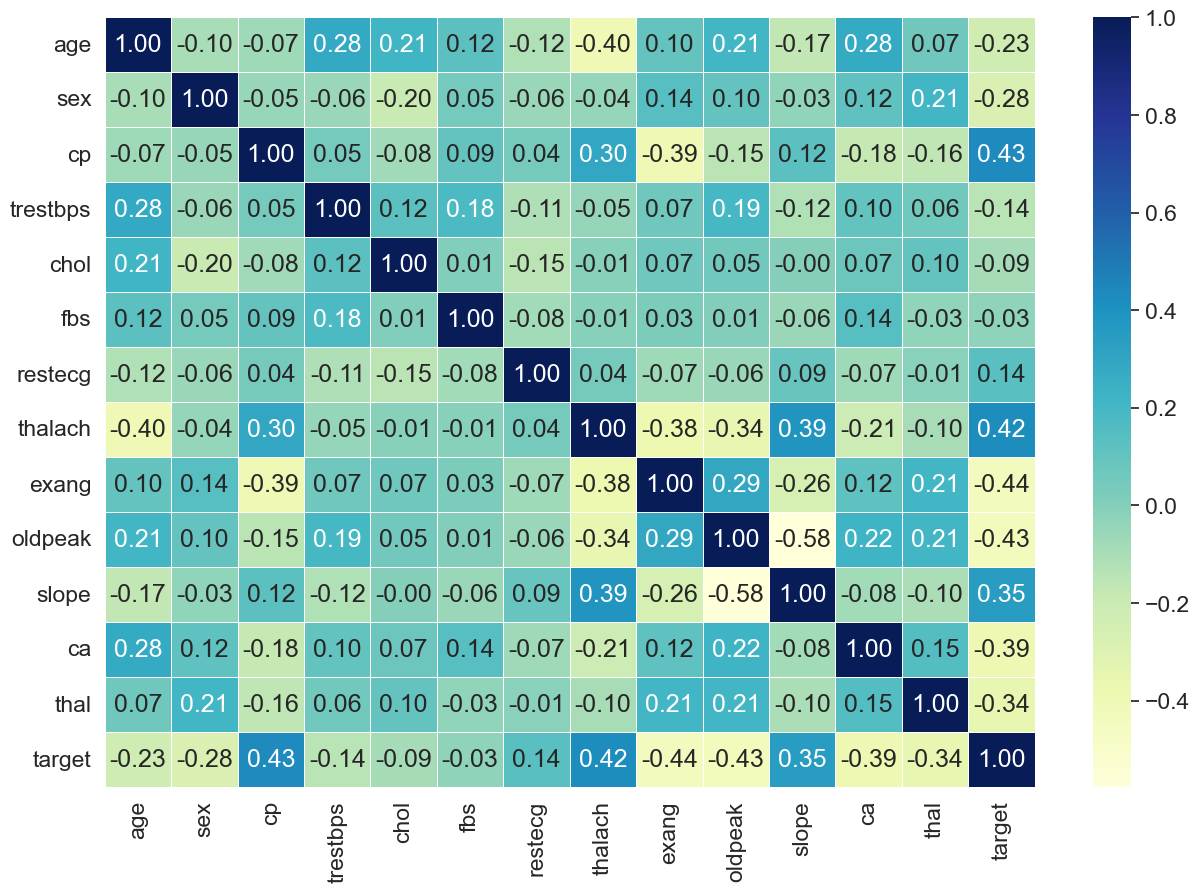

In [69]:
#Let's make our correlation matrix a little more prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt='.2f',
               cmap='YlGnBu')

## 5.Modelling

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
#Split data into X and y
X=df.drop("target",axis=1)
y=df['target']

In [72]:
#Split data into training and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [73]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
173,58,1,2,132,224,0,0,173,0,3.2,2,2,3
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3


In [74]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2


In [75]:
y_train

87     1
173    0
298    0
90     1
48     1
      ..
251    0
216    0
279    0
52     1
236    0
Name: target, Length: 242, dtype: int64

Now we've got our data split into training and test sets, it's time to build a machine learning model

We'll train it(find the patterns) on the training set.

And we'll test it (use the pattern) on the test set.

we're going to try 3 different machine learning models.

1. Logistic Regression
2. K-nearest neighbors classifier
3. Random Forest classifier

In [76]:
#Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}
#Create a Function to fit and score models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    fits and evaluates machine learning models
    models: a dictionary of different Scikit-learn models
    X_train: training data(No labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores={}
    #Loop through the models
    for name,model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and Append it's value to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [77]:
model_scores= fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\dskum\ML\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8360655737704918,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8032786885245902}

### MODEL Comparison

In [78]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.836066,0.57377,0.803279


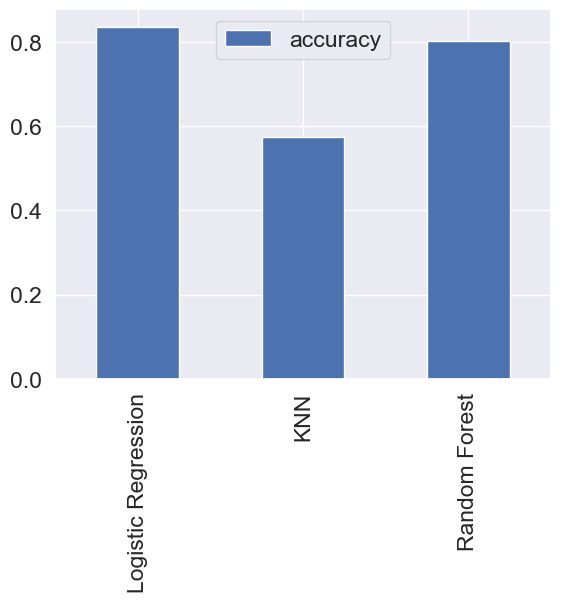

In [79]:
model_compare.T.plot.bar();

Now we've got a baseline model and we know a model's first predictions aren't always what we should base our next steps off of..

What should we do now??

Let's look at the following:-

* Hyperparameter tuning
* Feature importance
* confusion matrix
* cross-validation
* Precision
* Recall
* f1 score
* classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [80]:
# let us tune KNN
train_scores=[]
test_scores=[]
#Create a list of different values for n-neighbors
neighbors=range(1,21)
#Setup KNN instance
knn=KNeighborsClassifier()
#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit  the algorithm
    knn.fit(X_train,y_train)
    #update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    #Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [81]:
train_scores

[1.0,
 0.8016528925619835,
 0.7933884297520661,
 0.768595041322314,
 0.7768595041322314,
 0.7644628099173554,
 0.7520661157024794,
 0.7231404958677686,
 0.743801652892562,
 0.7231404958677686,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.7024793388429752,
 0.6859504132231405,
 0.6983471074380165,
 0.6900826446280992,
 0.7107438016528925,
 0.7107438016528925]

In [82]:
test_scores

[0.5901639344262295,
 0.5081967213114754,
 0.5409836065573771,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.6557377049180327,
 0.5901639344262295,
 0.639344262295082,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.639344262295082]

Maximum KNN score on the test data: 68.85%


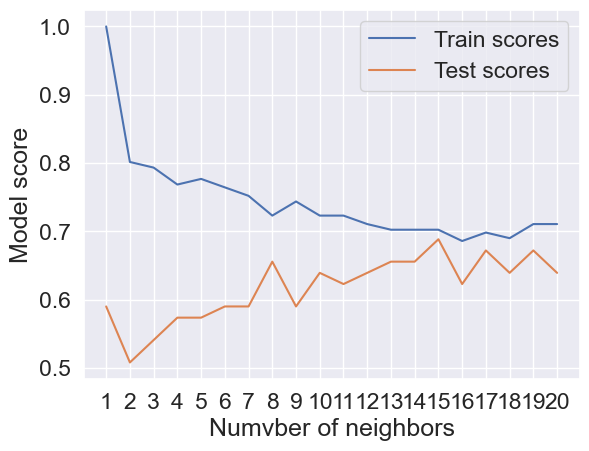

In [83]:
plt.plot(neighbors,train_scores,label="Train scores")
plt.plot(neighbors,test_scores,label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Numvber of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedzSearchCV

We're going to tune:
* Logisitic regression()
* RandomForestClassifier()
  .... using RandonmizedSearchCV

In [84]:
#Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

Now we've got our grids setup in the model, let's tune them using RandomisedSearchCV

In [85]:
#Tune logistic Regression
np.random.seed(42)
#Setup hyperparameter search for logisitc regression
res_log_reg= RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search for Logistic regression
res_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [86]:
res_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [87]:
res_log_reg.score(X_test,y_test)

0.8360655737704918

Now we do the same thing for random forest classifier

In [88]:
#Setup random seed
np.random.seed(42)
#Setup random hyperparameter for RandomForestClassifier()
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
#Fit random hyperparameter search model for
RandomForestClassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [89]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [90]:
rs_rf.score(X_test,y_test)

0.819672131147541

### Hyperparameter tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [91]:
np.random.seed(42)
#Different Hyperparameter for our Logistic Regression Model
log_reg_grid={"C": np.logspace(-4,4,20),
              "solver":["liblinear"]}
#Setup grid hyperparameter search for Logistic Regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
#Fit the Hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [92]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [93]:
#Evaluate the grid search logistic regressionm model
gs_log_reg.score(X_test,y_test)

0.8360655737704918

## Evaluating our tuned maching learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classsification Report
* Precision
* Recall
* F1-Score

  ..... and it would be great if cross-validation was used where possible

  To make comparisons and evaluate our trained models, first we need to make predictions

In [94]:
#make predictions with tuned models
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

[[20  4]
 [ 6 31]]


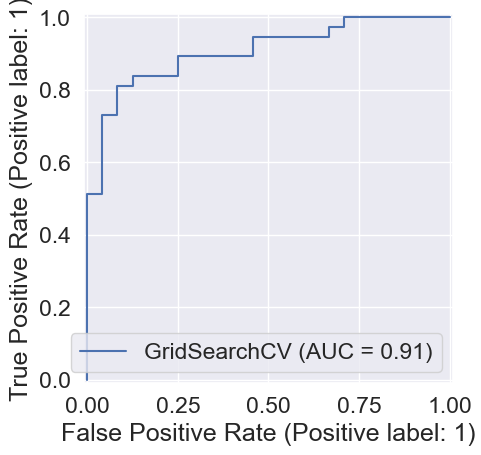

In [95]:
#Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
#Confusion Matrix
print(confusion_matrix(y_test,y_preds))

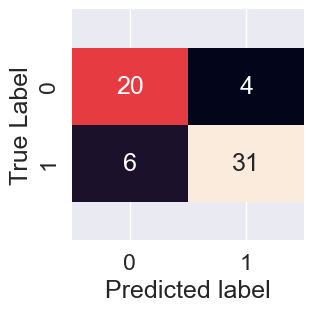

In [96]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's Heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(y_test,y_preds)

In [97]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.89      0.84      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



### Classification Evaluation metrics using cross validation

We're going to calculate,precision,recall,f1_score using `cross_val_score`

In [98]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [99]:
#Create a new classifier with best hyperparameters
clf=LogisticRegression(C=0.08858667904100823,
                       solver='liblinear')

In [100]:
#Cross-validated Accuracy 
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='accuracy')
cv_acc.mean()

0.834808743169399

In [101]:
#Cross validated Precision
cv_precision=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring='precision')
cv_precision.mean()

0.8182683982683983

In [102]:
#Cross-validated recall
cv_recall=cross_val_score(clf,
                          X,
                          y,
                          cv=5,
                          scoring='recall')
cv_recall.mean()
                

0.9030303030303031

In [103]:
#cross validated f1-score
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring='f1')
cv_f1.mean()        

0.8572876223964055

<Axes: title={'center': 'cross-validated classification'}>

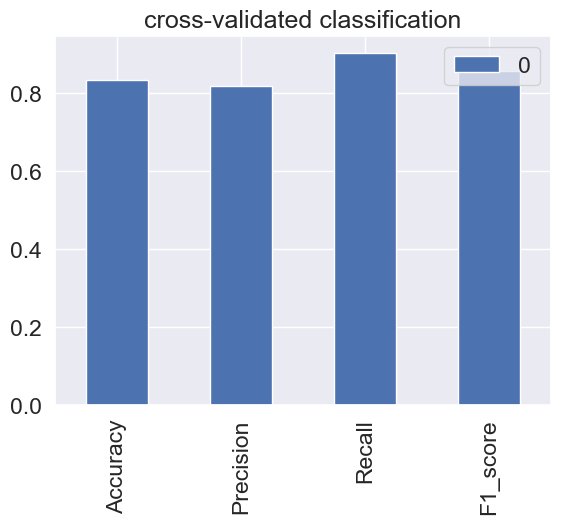

In [104]:
#Visualisation of the metrics(Cross-validated)
cv_metrics=pd.DataFrame({"Accuracy":cv_acc.mean(),
                         "Precision":cv_precision.mean(),
                         "Recall":cv_recall.mean(),
                         "F1_score":cv_f1.mean()},
                         index=[0])    
cv_metrics.T.plot.bar(title="cross-validated classification")

### Feature Importance

Feature Importance is another way of asking, " which features contributed to the outcomes of the model? and how did they contribute?"

Finding Feature Importance is different for each Machine learning model

In [105]:
#Fit an instance of Logistic Regeression
gs_log_reg.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [108]:
clf=LogisticRegression(C=0.615848211066026,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [110]:
#Check Coefficient
clf.coef_

array([[ 0.00684683, -1.38194605,  0.85798548, -0.01678218, -0.00361449,
         0.13538631,  0.36575518,  0.03122193, -0.60230565, -0.5002426 ,
         0.54783428, -0.80078784, -0.6625104 ]])

In [113]:
#Match coef's of features to columns
features_dict=dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': 0.006846834278733799,
 'sex': -1.3819460518463762,
 'cp': 0.857985481526486,
 'trestbps': -0.016782178811790237,
 'chol': -0.0036144915646671304,
 'fbs': 0.1353863111819707,
 'restecg': 0.36575518060706824,
 'thalach': 0.031221934982774063,
 'exang': -0.6023056510172561,
 'oldpeak': -0.5002426007410911,
 'slope': 0.5478342848037163,
 'ca': -0.8007878359666701,
 'thal': -0.6625103998977622}

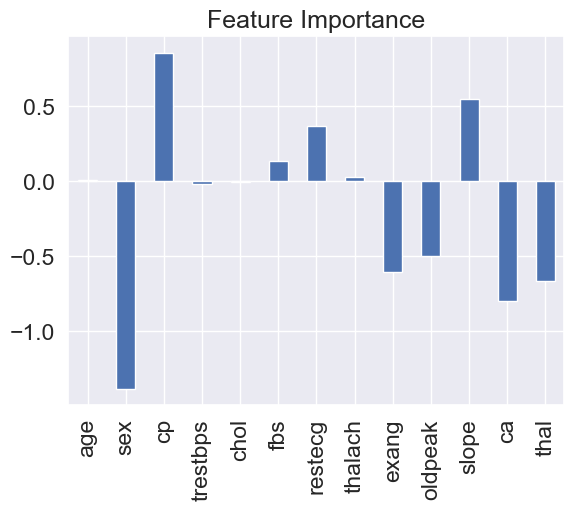

In [116]:
#Visualise feature importance
features_df=pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature Importance",legend=False);